In [ ]:
IBM HR Analytics Employee Attrition Modeling .

DESCRIPTION

IBM is an American MNC operating in around 170 countries with major business vertical as computing, software, and hardware.
Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. 
The organization would like to identify the factors which influence the attrition of employees.

Analysis Task:
- Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy, and seaborn.
- Exploratory data analysis

    Find the age distribution of employees in IBM
    Explore attrition by age
    Explore data for Left employees
    Find out the distribution of employees by the education field
    Give a bar chart for the number of married and unmarried employees

- Build up a logistic regression model to predict which employees are likely to attrite.

In [ ]:
##IBM attrition data science project...
#let's import librairies, pandas, numpy, matplotlib.pyplot, and seaborn
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns

In [124]:
#let's define data path for our dataset
data_path = ("/Users/sph-it/Desktop/AI/IBM-ATTRITION.csv")
read_data = pd.read_csv(data_path)
read_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [125]:
names = read_data.columns.values
names

array(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'], dtype=object)

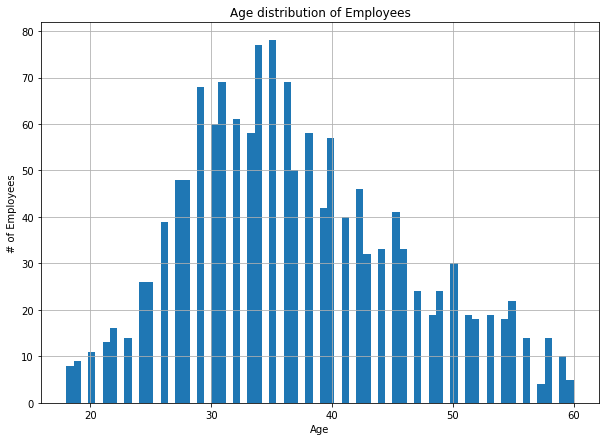

In [126]:
##Find the age distribution of employees in IBM(Histogram)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
read_data['Age'].hist(bins=70)
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("# of Employees")
plt.show()

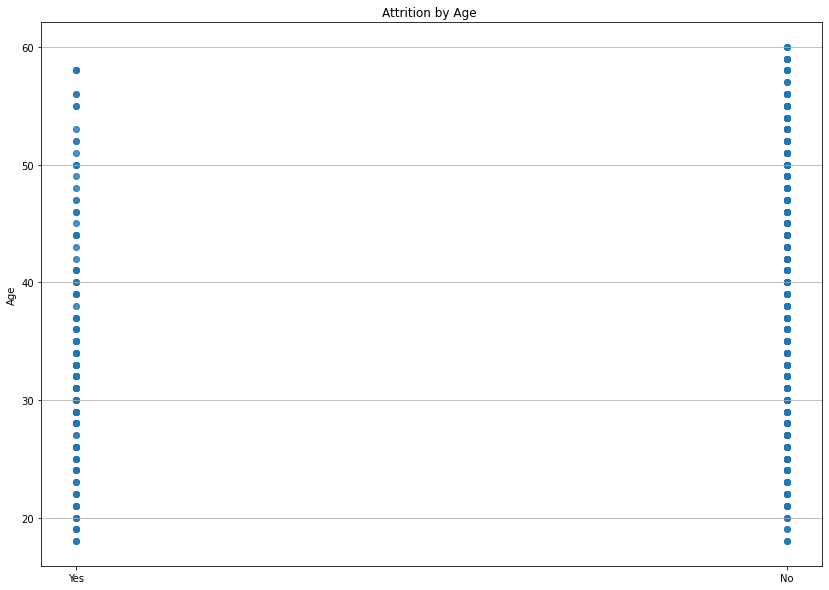

In [127]:
#Explore attrition by age from the dataset...
plt.figure(figsize=(14,10))
plt.scatter(read_data.Attrition,read_data.Age, alpha=.55)
plt.title("Attrition by Age ")
plt.ylabel("Age")
plt.grid(b=True, which='major',axis='y')
plt.show()

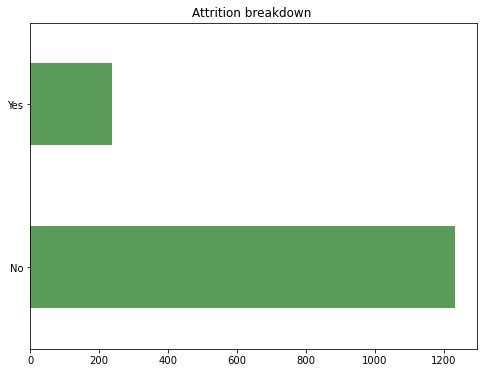

In [128]:
# explore data for Left employees breakdown
plt.figure(figsize=(8,6))
read_data.Attrition.value_counts().plot(kind='barh',color='#060',alpha=.65)
plt.title("Attrition breakdown ")
plt.show()

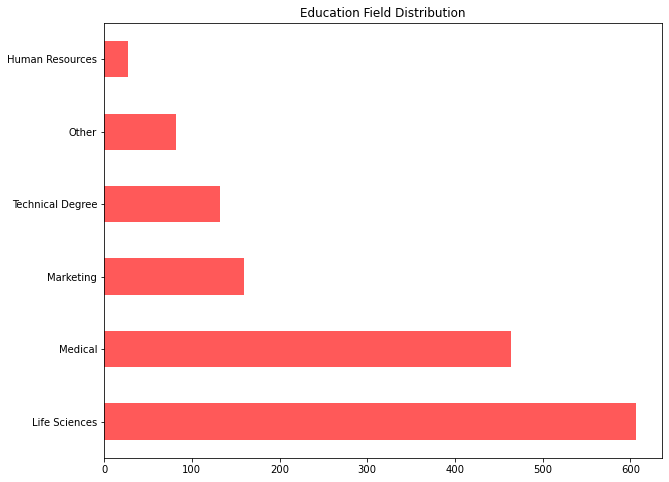

In [129]:
# explore data for Education Field distribution
plt.figure(figsize=(10,8))
read_data.EducationField.value_counts().plot(kind='barh',color='red',alpha=.65)
plt.title("Education Field Distribution")
plt.show()

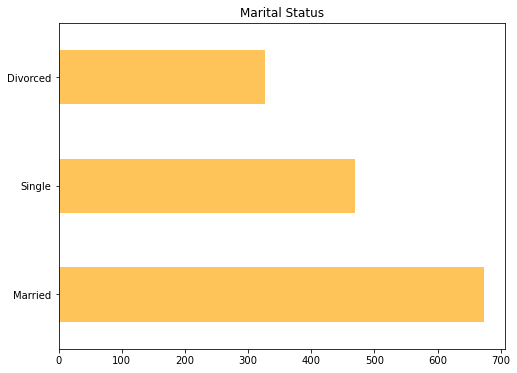

In [130]:
# explore data for Marital Status
plt.figure(figsize=(8,6))
read_data.MaritalStatus.value_counts().plot(kind='barh',color='orange',alpha=.65)
plt.title("Marital Status")
plt.show()

In [131]:
##let's describe the content of our dataset...
read_data.describe

<bound method NDFrame.describe of       Age Attrition              Department  DistanceFromHome  Education  \
0      41       Yes                   Sales                 1          2   
1      49        No  Research & Development                 8          1   
2      37       Yes  Research & Development                 2          2   
3      33        No  Research & Development                 3          4   
4      27        No  Research & Development                 2          1   
...   ...       ...                     ...               ...        ...   
1465   36        No  Research & Development                23          2   
1466   39        No  Research & Development                 6          1   
1467   27        No  Research & Development                 4          3   
1468   49        No                   Sales                 2          3   
1469   34        No  Research & Development                 8          3   

     EducationField  EnvironmentSatisfaction  JobSati

In [132]:
#let's get more informations about the dataset..
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [133]:
#let's get all columns from the dataset..
read_data.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [134]:
read_data.std()

Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

In [135]:
read_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [136]:
read_data['Attrition'].dtypes

dtype('O')

In [81]:
read_data['Attrition'].replace('Yes',1, inplace=True)
read_data['Attrition'].replace('No',0, inplace=True)

In [1]:
read_data.head(10)

NameError: name 'read_data' is not defined

In [138]:
# building up a logistic regression model from the dataset....
X = read_data.drop(['Attrition'],axis=1)
X.head()
Y = read_data['Attrition']
Y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [84]:
read_data['EducationField'].replace('Life Sciences',1, inplace=True)
read_data['EducationField'].replace('Medical',2, inplace=True)
read_data['EducationField'].replace('Marketing', 3, inplace=True)
read_data['EducationField'].replace('Other',4, inplace=True)
read_data['EducationField'].replace('Technical Degree',5, inplace=True)
read_data['EducationField'].replace('Human Resources', 6, inplace=True)

In [139]:
read_data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [140]:
read_data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [88]:
read_data['Department'].replace('Research & Development',1, inplace=True)
read_data['Department'].replace('Sales',2, inplace=True)
read_data['Department'].replace('Human Resources', 3, inplace=True)

In [141]:
read_data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [90]:
read_data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [91]:
read_data['MaritalStatus'].replace('Married',1, inplace=True)
read_data['MaritalStatus'].replace('Single',2, inplace=True)
read_data['MaritalStatus'].replace('Divorced',3, inplace=True)

In [142]:
read_data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [143]:
x=read_data.select_dtypes(include=['int64'])
x.dtypes

Age                        int64
DistanceFromHome           int64
Education                  int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [94]:
x.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [144]:
y = read_data['Attrition']

In [145]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [153]:
#let's import require librairie
from patsy import dmatrices
y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  read_data, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Department[T.Research & Development]',
       'Department[T.Sales]', 'EducationField[T.Life Sciences]',
       'EducationField[T.Marketing]', 'EducationField[T.Medical]',
       'EducationField[T.Other]', 'EducationField[T.Technical Degree]', 'Age',
       'DistanceFromHome', 'Education', 'YearsAtCompany'],
      dtype='object')


In [154]:
y = np.ravel(y)

In [ ]:
##let's import require librairie
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(x,y)
# check the accuracy on the training set
model.score(x,y)

In [115]:
y.mean()

0.16122448979591836

In [121]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)
model2=LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression()

In [122]:
predicted= model2.predict(x_test)
print (predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [123]:
probs = model2.predict_proba(x_test)
print (probs)

[[0.88854645 0.11145355]
 [0.68074767 0.31925233]
 [0.78206967 0.21793033]
 [0.77561848 0.22438152]
 [0.95545376 0.04454624]
 [0.75547465 0.24452535]
 [0.94845664 0.05154336]
 [0.93137174 0.06862826]
 [0.84587117 0.15412883]
 [0.75728324 0.24271676]
 [0.95935542 0.04064458]
 [0.84858823 0.15141177]
 [0.82975238 0.17024762]
 [0.91257224 0.08742776]
 [0.84021317 0.15978683]
 [0.94263502 0.05736498]
 [0.76135841 0.23864159]
 [0.66445122 0.33554878]
 [0.69704524 0.30295476]
 [0.78192691 0.21807309]
 [0.90541469 0.09458531]
 [0.87524399 0.12475601]
 [0.93228329 0.06771671]
 [0.8486626  0.1513374 ]
 [0.70351642 0.29648358]
 [0.96905604 0.03094396]
 [0.75719091 0.24280909]
 [0.8049162  0.1950838 ]
 [0.89279463 0.10720537]
 [0.85098009 0.14901991]
 [0.82839141 0.17160859]
 [0.90904649 0.09095351]
 [0.85273018 0.14726982]
 [0.83066484 0.16933516]
 [0.77059964 0.22940036]
 [0.95069671 0.04930329]
 [0.65976321 0.34023679]
 [0.69306657 0.30693343]
 [0.83502302 0.16497698]
 [0.83403887 0.16596113]
